<a href="https://colab.research.google.com/github/cgmircea/misc/blob/main/House_price_predictionsPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
#Cell 0: Utils
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')

In [ ]:
# Cell 1: Imports
import pandas as pd
from pycaret.regression import *

In [ ]:
# Cell 2: Load data
data = pd.read_csv("sample_data/Hyderabad.csv")
display(data.head())

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


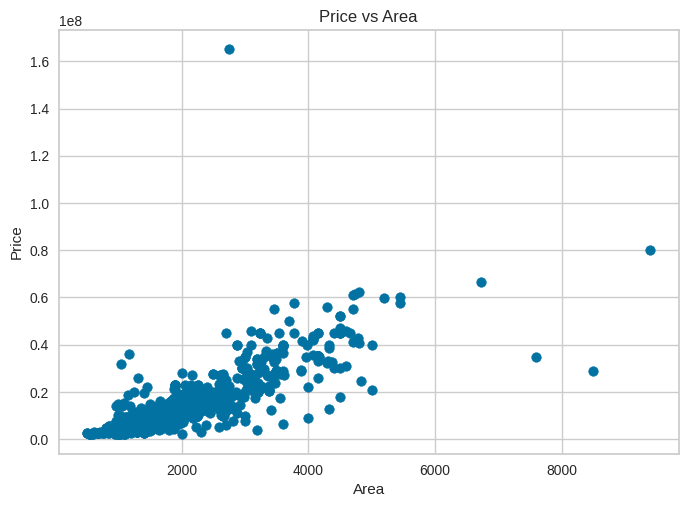

In [ ]:
# Cell 3: Scatter plot Area vs Price
plt.scatter(data['Area'], data['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.show()

In [ ]:
# Cell 4–6: Simple linear regression on Area only
simple_df = data[['Area', 'Price']].dropna()

reg1 = setup(data=simple_df, target='Price', session_id=123,
             normalize=True,
             feature_selection=False,
             verbose=False)

simple_model = create_model('lr')

metrics_df = pull()
print(metrics_df)

# Access the coefficients directly from the model object
# For a single feature linear regression, coef_ will be an array with one element
m = simple_model.coef_[0]
b = simple_model.intercept_

print("slope:", m)
print("y-intercept:", b)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2155302.6002,11903009216123.1094,3450073.7986,0.8042,0.2958,0.2330
1,2276955.1053,13553947652765.0625,3681568.6402,0.7752,0.2957,0.2573
2,2241947.1342,11575090244274.3066,3402218.4298,0.8682,0.2993,0.2542
3,2133513.5071,12003109855970.0723,3464550.4551,0.5954,0.4373,0.2916
4,2630480.3226,20122071469252.1016,4485763.1981,0.6884,0.3947,0.2999
5,2107541.4180,11460918147184.4043,3385397.7827,0.8523,0.3077,0.2357
6,2457164.4408,21397262106920.0781,4625717.4694,0.7008,0.3575,0.2759
7,3132811.3224,133927138499582.5469,11572689.3374,0.3214,0.3657,0.2476
8,2428036.5178,16919776476743.1289,4113365.5900,0.7477,0.4537,0.2830


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

slope: 7285580.362250202
y-intercept: 9833355.248013621


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1910646.5328,10577977298461.8691,3252380.2512,0.8260,0.3147,0.2129
1,2315570.5250,13994419680998.6602,3740911.6110,0.7679,0.3444,0.2774
2,2079313.6851,10507476511159.3848,3241523.7946,0.8803,0.4236,0.2626
3,1757045.3312,8286042723678.5293,2878548.7183,0.7207,0.3234,0.2500
4,2266893.5901,15077831147140.0605,3883018.3037,0.7665,0.4746,0.2600
5,1984732.3041,9755138284485.7949,3123321.6748,0.8743,0.3117,0.2550
6,2207727.5985,15538369165234.2344,3941873.8140,0.7827,0.3213,0.2656
7,2808947.0450,131128827578342.6094,11451149.6182,0.3356,0.3832,0.2154
8,2142865.6516,15418423986458.8809,3926630.1056,0.7701,0.4407,0.2443


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Coeffiecients:  [ 7082962.98168815  2046494.87566757 -1223902.79861056   263068.92776273
 -1574059.41815953 -1161575.42349686  -599342.74633368  1651817.08285638
  -698208.77599938  -122013.02407521   858681.61211391    16221.72486668
   184982.42199922   -29585.07811231    33353.42056778   695872.11940507
 -3188394.16100009 -1095987.49061102   273811.87385085   103591.23554375
  -446023.01789971  1927812.17750816   342086.53524385  3340132.67738785
  1404002.11562098   478301.3102883    493208.58811803   150978.17201774
   581795.25327131  -706466.88781311  4023255.24151277   446940.7072779
 -1965698.40406264 -4098649.08106378  1025243.62274226  -854339.97988835
 -1731545.09275634   340593.73406656  -300852.33127366]
Intercept: 9833355.248013623


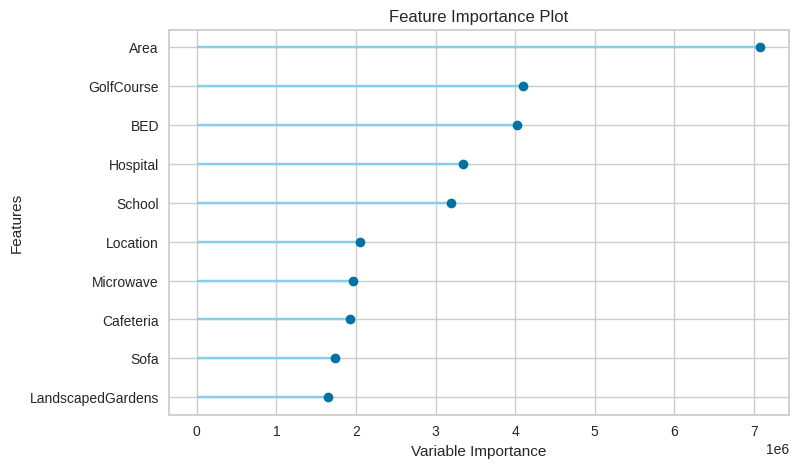

               MAE           MSE          RMSE      R2   RMSLE    MAPE
Fold                                                                  
0     1.910647e+06  1.057798e+13  3.252380e+06  0.8260  0.3147  0.2129
1     2.315571e+06  1.399442e+13  3.740912e+06  0.7679  0.3444  0.2774
2     2.079314e+06  1.050748e+13  3.241524e+06  0.8803  0.4236  0.2626
3     1.757045e+06  8.286043e+12  2.878549e+06  0.7207  0.3234  0.2500
4     2.266894e+06  1.507783e+13  3.883018e+06  0.7665  0.4746  0.2600
5     1.984732e+06  9.755138e+12  3.123322e+06  0.8743  0.3117  0.2550
6     2.207728e+06  1.553837e+13  3.941874e+06  0.7827  0.3213  0.2656
7     2.808947e+06  1.311288e+14  1.145115e+07  0.3356  0.3832  0.2154
8     2.142866e+06  1.541842e+13  3.926630e+06  0.7701  0.4407  0.2443
9     1.978340e+06  1.003778e+13  3.168246e+06  0.8695  0.2903  0.2326
Mean  2.145208e+06  2.403223e+13  4.260760e+06  0.7594  0.3628  0.2476
Std   2.742122e+05  3.578899e+13  2.424490e+06  0.1504  0.0604  0.0203


In [ ]:
# Cell 8–9: Full linear model with all features
reg2 = setup(data=data, target='Price', session_id=123,
             normalize=True,
             categorical_features=['Location'],  # adjust as needed
             verbose=False)

full_model = create_model('lr')

print("Coeffiecients: ", full_model.coef_)
print("Intercept:", full_model.intercept_)

plot_model(full_model, plot='feature')

metrics_df = pull()
print(metrics_df)

In [ ]:
# Cell 10: Evaluate on training data
predictions = predict_model(full_model, data=data)
metrics_df = pull()
print("Evaluation metrics:\n", metrics_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2097737.7071,19933152307150.3320,4464655.9002,0.7412,0.3476,0.2451


Evaluation metrics:
                Model           MAE           MSE          RMSE      R2  \
0  Linear Regression  2.097738e+06  1.993315e+13  4.464656e+06  0.7412   

    RMSLE    MAPE  
0  0.3476  0.2451  
